In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.layers import Dropout
import keras
import numpy as np

Using TensorFlow backend.


In [96]:
mrt_status_1 = read_csv("mrt_status.csv")
dataset = read_csv("dataset.csv")
mrt_status = mrt_status_1
mrt_status.head()
mrt_status["day"] = mrt_status.day.apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))
mrt_status = mrt_status.rename(columns={'day': 'date'})
dataset["date"] = dataset.date.apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))

new_time = []
for i in range(len(mrt_status.time.values)):
    temp = mrt_status.time[i].split(":")
    if "PM" in temp[1]:
        new_time.append(int(temp[0]) + 12)
    elif "AM" in temp[1]:
        new_time.append(int(temp[0]))
        
new_time = pd.Series(new_time)

mrt_status["time"] = new_time.values

#CAT types
s = pd.Series(list(mrt_status.cat_type.values))
cat_types=pd.get_dummies(s)

#direction
dire = pd.Series(list(mrt_status.dir.values))
direction = pd.get_dummies(dire)
mrt_status = mrt_status.join(cat_types)
mrt_status = mrt_status.join(direction)

df1 = pd.merge(dataset, mrt_status, on=['time', 'date'], how='left')
df1=df1.fillna(value=0)
final_dataset = df1[["time", "holiday", "days", "weekday", "na_entry", "CAT 1", "CAT 2", "CAT 3", "CAT 4", "North Bound"]]

In [105]:
final_dataset

,time,holiday,days,weekday,na_entry,CAT 1,CAT 2,CAT 3,CAT 4,North Bound
0,6,1,1,6,418,0.0,0.0,0.0,0.0,0.0
1,7,1,1,6,689,0.0,0.0,0.0,0.0,0.0
2,8,1,1,6,926,0.0,0.0,0.0,0.0,0.0
3,9,1,1,6,1283,0.0,0.0,0.0,0.0,0.0
4,10,1,1,6,1903,0.0,0.0,0.0,0.0,0.0
5,11,1,1,6,2470,0.0,0.0,0.0,0.0,0.0
6,12,1,1,6,2193,0.0,0.0,0.0,0.0,0.0
7,13,1,1,6,2228,0.0,0.0,0.0,0.0,0.0
8,14,1,1,6,2215,0.0,0.0,0.0,0.0,0.0
9,15,1,1,6,1982,0.0,0.0,0.0,0.0,0.0


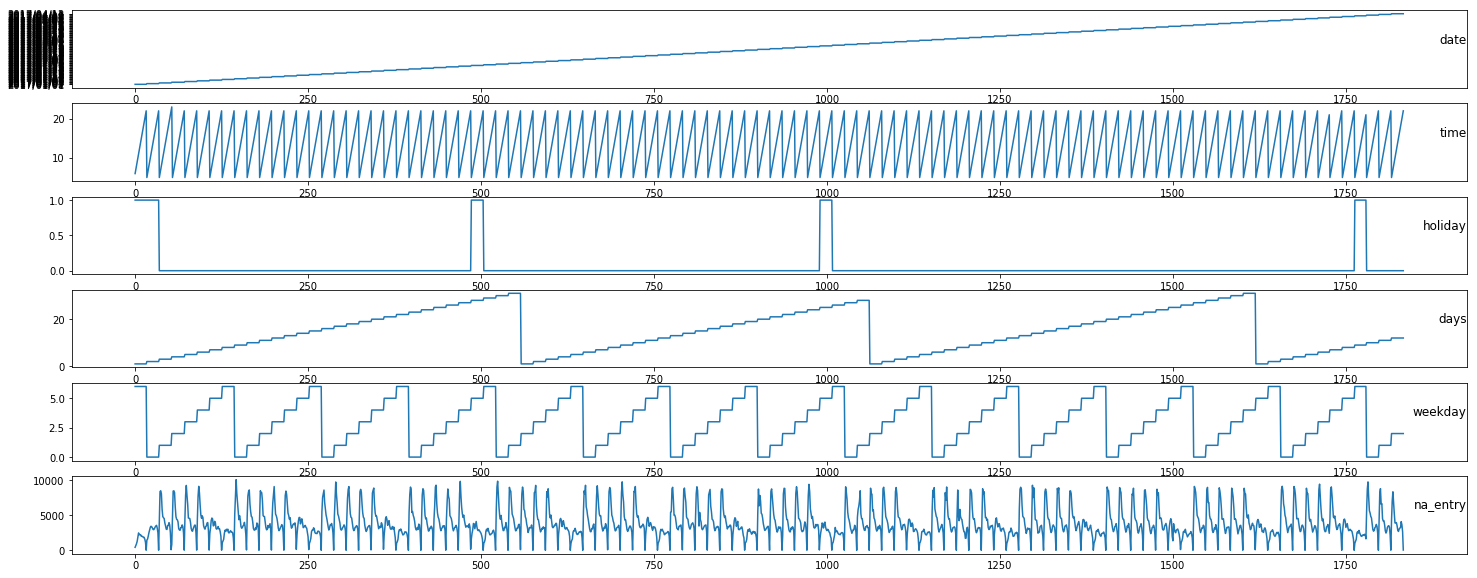

In [22]:
data = dataset[["date", "time", "holiday", "days", "weekday", "na_entry"]]
values = data.values

groups = [0,1,2,3,4,5]
i = 1

plt.figure(figsize=(25,10))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(data.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

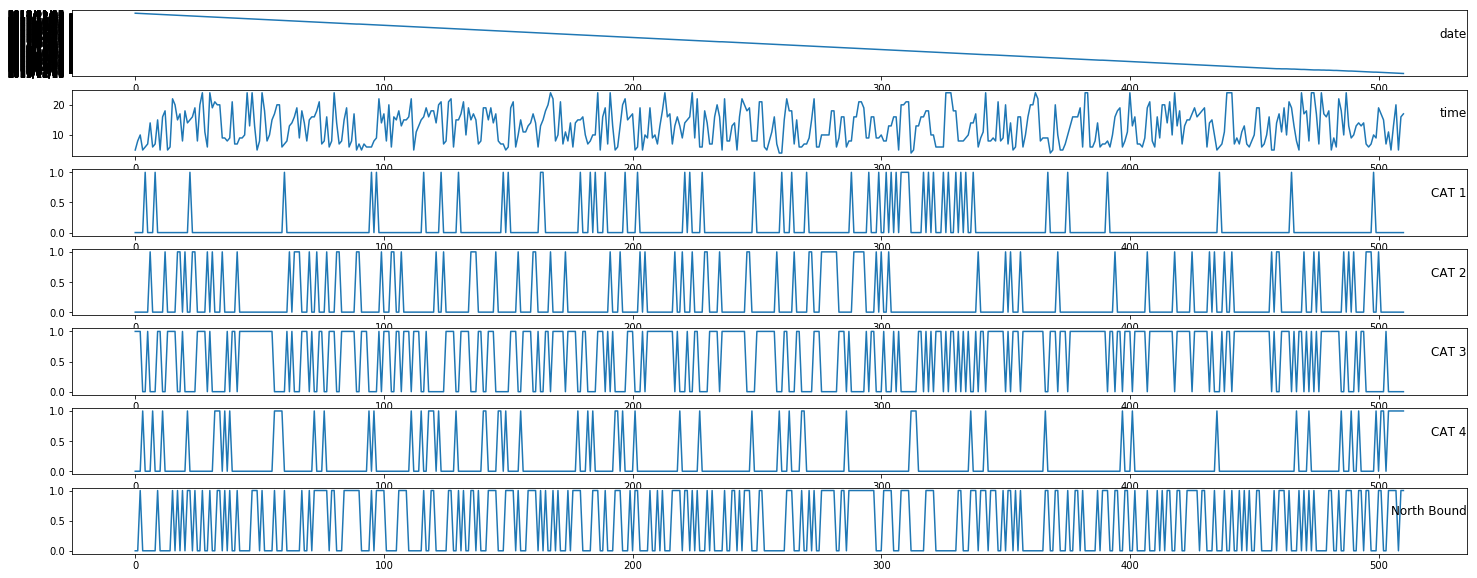

In [30]:
datadata = mrt_status[["date", "time", "CAT 1", "CAT 2", "CAT 3", "CAT 4", "North Bound"]]
values = datadata.values

groups = [0,1,2,3,4,5,6]
i = 1

plt.figure(figsize=(25,10))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(datadata.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [114]:
dataset = read_csv("dataset.csv")
dataset_ = dataset[["time", "na_entry"]]

#scale and normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(dataset_)
dataset_scaled = scaler.transform(dataset_)
data_naive = pd.DataFrame(dataset_scaled)

data_frame = concat([data_naive.shift(1), data_naive], axis=1)
data_frame.columns = ['t1', 't2', "na1", "na2"]
dataframe = data_frame[["t2","na2"]]

# split into train and test sets
X = dataframe.values
train_size = 1520
val_size = 1620
train, validation, test = X[1:train_size], X[train_size:val_size], X[val_size:]
train_X, train_y = train[:,0], train[:,1]
val_X, val_y = validation[:,0], validation[:,1]
test_X, test_y = test[:,0], test[:,1]



Test MSE: 0.019


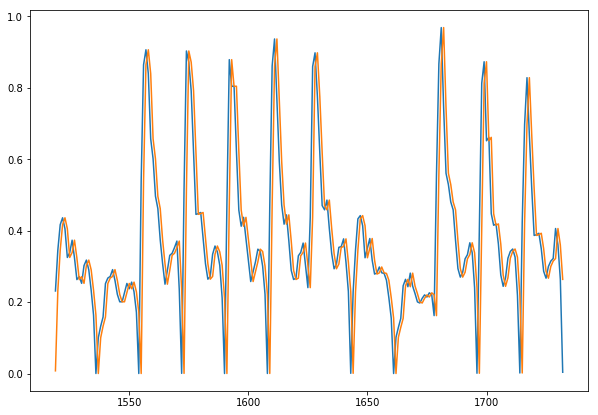

In [115]:
#Create a base model to measure performance (naive model)

# Naive Model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 
# plot predictions and expected results
plt.figure(figsize=(10,7))
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [119]:
# MLP Model

dataset = final_dataset[["na_entry","time", "holiday", "days", "weekday", "CAT 1", "CAT 2", "CAT 3", "CAT 4", "North Bound"]]
dataset["na_entry_lag"]=dataset["na_entry"].shift(1)
dataset = dataset[1:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(dataset)
dataset_scaled = scaler.transform(dataset)

train_size = 1520
val_size = 1620
train, validation, test = dataset_scaled[1:train_size], dataset_scaled[train_size:val_size], dataset_scaled[val_size:]
train_X, train_y = train[:,1:], train[:,0]
val_X, val_y = validation[:,1:], validation[:,0]
test_X, test_y = test[:,1:], test[:,0]

#inverse scale
#scaler.inverse_transform(dataset_scaled)

def fit_model(train_X, train_y, test_X, test_y, epochs):
    model = Sequential()
    model.add(Dense(8, activation='relu', input_dim=train_X.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    adam = keras.optimizers.Adam(lr=0.008, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer= adam, metrics=['mse'])
    history = model.fit(train_X, train_y, epochs=epochs, 
              batch_size=32, validation_data=(test_X, test_y), 
              verbose=2, shuffle=True)
    
    return model, history

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [89]:
# Fit MLP Model
final_model, history = fit_model(train_X, train_y, val_X, val_y, 2500)

results = final_model.predict(val_X)
print('Validation MSE: %.3f' % mean_squared_error(val_y, results))

Train on 1519 samples, validate on 100 samples
Epoch 1/2500
 - 0s - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 2/2500
 - 0s - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 3/2500
 - 0s - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 4/2500
 - 0s - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 5/2500
 - 0s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 6/2500
 - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 7/2500
 - 0s - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 8/2500
 - 0s - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 9/2500
 - 0s - loss: 0.0150

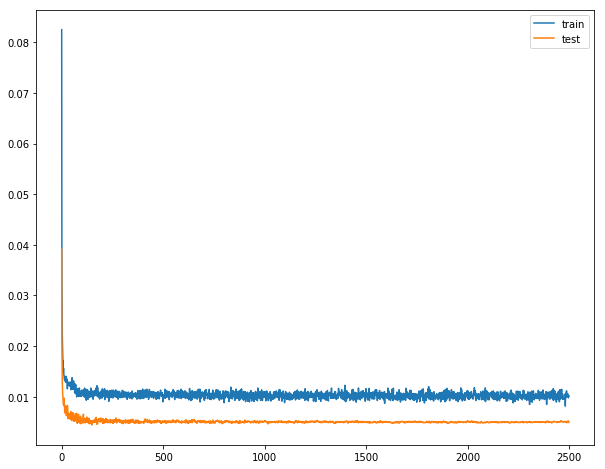

In [120]:
# Plot training and validation performance
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [121]:
# Final Test MSE
stored_results = final_model.predict(test_X)
print("Test Mse: %.3f" % mean_squared_error(test_y, stored_results))

Test Mse: 0.004


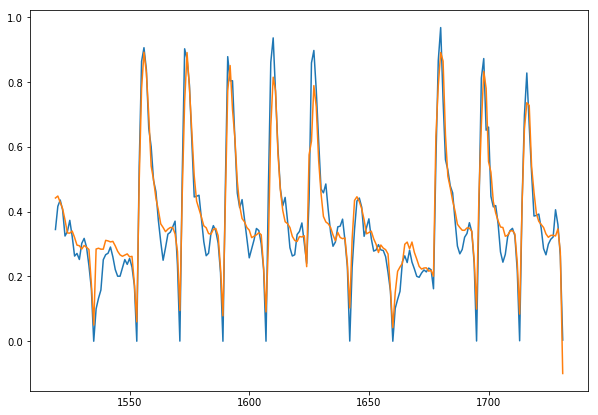

In [122]:
# Compare Predicted values to True Valuse of test set
plt.figure(figsize=(10,7))
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in stored_results])
plt.show()

In [85]:
# Testing: Multi-step Prediction

import numpy as np
inputs = test_X[:,:-1]
X_input = test_X[:,4:][0]

def predict_multi_step(model, X, inputs):
    predicts = list()
    predicts.append(X)
    
    for i in range(len(inputs)):
        test = np.append(inputs[i], predicts[i])
        forecast_val = model.predict(np.expand_dims(test, axis=0))
        predicts.append(forecast_val)
        
    return predicts[1:]
        
predictions = predict_multi_step(final_model, X_input, inputs)

plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

ValueError: Error when checking : expected dense_1_input to have shape (10,) but got array with shape (15,)